In [2]:
import numpy as np #矩阵运算
import matplotlib.pyplot as plt #作图
from mpl_toolkits.mplot3d import Axes3D

In [46]:
list_point = [np.array([1,2,1]),np.array([5,3,2]),
              np.array([0,0,0]),np.array([1,0,0])]
lists1=np.array([[-5.01,-8.12,-3.68],[-5.43,-3.48,-3.54],
                 [1.08,-5.52,1.66],[0.86,-3.78,-4.11],[-2.67,0.63,7.39],
                 [4.94,3.29,2.08],[-2.51,2.09,-2.59],[-2.25,-2.13,-6.94],
                 [5.56,2.86,-2.26],[1.03,-3.33,4.33]])
lists2=np.array([[-0.91,-0.18,-0.05],[1.30,-2.06,-3.53],
                 [-7.75,-4.54,-0.95],[-5.47,0.50,3.92],[6.14,5.72,-4.85],
                 [3.60,1.26,4.36],[5.37,-4.63,-3.65],[7.18,1.46,-6.66],
                 [-7.39,1.17,6.30],[-7.50,-6.32,-0.31]])
lists3=np.array([[5.35,2.26,8.13],[5.12,3.22,-2.66],
                 [-1.34,-5.31,-9.87],[4.48,3.42,5.19],[7.11,2.39,9.21],
                 [7.17,4.33,-0.98],[5.75,3.97,6.65],[0.77,0.27,2.41],
                 [0.90,-0.43,-8.71],[3.52,-0.36,6.43]])
list_group = [lists1,lists2,lists3]

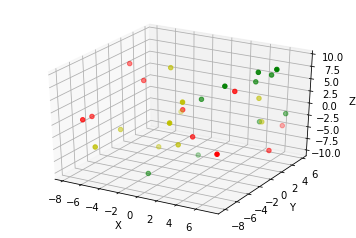

In [47]:
ax = plt.subplot(111, projection='3d')  # 创建一个三维的绘图工程
#  将数据点分成三部分画，在颜色上有区分度
ax.scatter(lists1[:, :1], lists1[:, 1:2], lists1[:, 2:3], c='y')  # 绘制数据点
ax.scatter(lists2[:, :1], lists2[:, 1:2], lists2[:, 2:3], c='r')
ax.scatter(lists3[:, :1], lists3[:, 1:2], lists3[:, 2:3], c='g')

ax.set_zlabel('Z')  # 坐标轴
ax.set_ylabel('Y')
ax.set_xlabel('X')
plt.show()

In [5]:
def getMean(points):
#     输入为矩阵 求列均值 10x3
    return np.mean(points,0)

In [6]:
def Mahalanovis_dis(point,points):  
    m_points = np.matrix(points)#10x3
    m_pointsT = m_points.T#3x10
    D = np.cov(m_pointsT,bias=True)#3x3
    invD = np.linalg.inv(D)
    u=getMean(points)#1x3
    point=np.matrix(point)
    dis = point-u#1x3
    disT=dis.T#3x1
    temp = np.dot(dis,invD)
    result = np.sqrt(np.dot(temp,disT))
    return float(result)

In [7]:
Mahalanovis_dis(np.array([1,2,1]),lists1)

1.0698729737115753

In [8]:

for i in list_point:
    count=0
    for j in list_group:
        count=count+1
        ans = Mahalanovis_dis(i,j)
        print(i,'  与集合',count,'的距离为 ',ans)

[1 2 1]   与集合 1 的距离为  1.0698729737115753
[1 2 1]   与集合 2 的距离为  0.9044653755297206
[1 2 1]   与集合 3 的距离为  2.8194414746233187
[5 3 2]   与集合 1 的距离为  1.6413677928169066
[5 3 2]   与集合 2 的距离为  1.8506499400391951
[5 3 2]   与集合 3 的距离为  0.6820073837310614
[0 0 0]   与集合 1 的距离为  0.5164648124154192
[0 0 0]   与集合 2 的距离为  0.28295260568499353
[0 0 0]   与集合 3 的距离为  2.362749904102995
[1 0 0]   与集合 1 的距离为  0.5135926390697754
[1 0 0]   与集合 2 的距离为  0.4762752259695465
[1 0 0]   与集合 3 的距离为  1.541437911538147


In [17]:
def getCov(points):
    m_points = np.matrix(points)#10x3
    m_pointsT = m_points.T#3x10
    D = np.cov(m_pointsT,bias=True)#3x3
    return D

In [32]:
count=0
for j in list_group:
    count=count+1
    ans = getCov(j)
    print("第",count,"类别协方差矩阵为")
    print(ans)

第 1 类别协方差矩阵为
[[12.94246   6.92584   3.71009 ]
 [ 6.92584  13.160809  3.516156]
 [ 3.71009   3.516156 17.752084]]
第 2 类别协方差矩阵为
[[ 33.146401   8.982834 -14.730076]
 [  8.982834  11.851696   0.368146]
 [-14.730076   0.368146  16.579096]]
第 3 类别协方差矩阵为
[[ 7.474281  6.700452 11.83462 ]
 [ 6.700452  7.704404 10.44775 ]
 [11.83462  10.44775  42.55856 ]]


In [28]:
def getLoss(point,points,px):
    point=np.matrix(point)#1X3
#     求协方差矩阵的逆
    m_points = np.matrix(points)#10x3
    m_pointsT = m_points.T#3x10
    D = np.cov(m_pointsT,bias=True)#3x3
    invD = np.linalg.inv(D)
    
    Wi = -0.5*invD
    a0 = np.dot(np.dot(point,Wi),point.T)
    
    u=getMean(points)
    wi = np.dot(invD,u)
    a1 = np.dot(wi.T,point.T)
    
    wi00 = -0.5*np.dot(np.dot(u.T,invD),u)
    wi01 = -0.5*np.log(np.linalg.det(D))
    wi02 = np.log(px)
    wi0 = wi00+wi01+wi02
    return float(a0+a1+wi0)

In [43]:
def determineType(point,list_group,p_list):
    k={}
    count=0
    for j in list_group:
        count=count+1
        ans = getLoss(point,j,p_list[count-1])
        print(point,'  判为集合 ',count,' 的判别函数值  ',ans)
        k[count] = ans
    sortlist=sorted(k.items(),key = lambda x:x[1],reverse = True)
    print(point,'  点最有可能为 w'+str(sortlist[0][0])+" 类")
    print()
    return sortlist

In [44]:
# 等可能
for i in list_point:
    determineType(i,list_group,[1/3,1/3,1/3])

[1 2 1]   判为集合  1  的判别函数值   -5.474314528872933
[1 2 1]   判为集合  2  的判别函数值   -5.420008090852984
[1 2 1]   判为集合  3  的判别函数值   -7.9285352274227225
[1 2 1]   点最有可能为 w2 类

[5 3 2]   判为集合  1  的判别函数值   -6.24904455458203
[5 3 2]   判为集合  2  的判别函数值   -6.723431883370463
[5 3 2]   判为集合  3  的判别函数值   -4.18647714874151
[5 3 2]   点最有可能为 w3 类

[0 0 0]   判为集合  1  的判别函数值   -5.035368390165355
[0 0 0]   判为集合  2  的判别函数值   -5.051010371618888
[0 0 0]   判为集合  3  的判别函数值   -6.7452036676790215
[0 0 0]   点最有可能为 w1 类

[1 0 0]   判为集合  1  的判别函数值   -5.033889138387036
[1 0 0]   判为集合  2  的判别函数值   -5.124398328523096
[1 0 0]   判为集合  3  的判别函数值   -5.141925530573207
[1 0 0]   点最有可能为 w1 类



In [45]:
# 不等可能
for i in list_point:
    determineType(i,list_group,[0.8,0.1,0.1])

[1 2 1]   判为集合  1  的判别函数值   -4.598845791519032
[1 2 1]   判为集合  2  的判别函数值   -6.62398089517892
[1 2 1]   判为集合  3  的判别函数值   -9.132508031748658
[1 2 1]   点最有可能为 w1 类

[5 3 2]   判为集合  1  的判别函数值   -5.373575817228129
[5 3 2]   判为集合  2  的判别函数值   -7.927404687696399
[5 3 2]   判为集合  3  的判别函数值   -5.390449953067446
[5 3 2]   点最有可能为 w1 类

[0 0 0]   判为集合  1  的判别函数值   -4.159899652811455
[0 0 0]   判为集合  2  的判别函数值   -6.254983175944824
[0 0 0]   判为集合  3  的判别函数值   -7.949176472004957
[0 0 0]   点最有可能为 w1 类

[1 0 0]   判为集合  1  的判别函数值   -4.158420401033136
[1 0 0]   判为集合  2  的判别函数值   -6.328371132849032
[1 0 0]   判为集合  3  的判别函数值   -6.345898334899143
[1 0 0]   点最有可能为 w1 类

